## ANALISIS DE DATOS DE ACTIVIDAD ELCTRODERMICA (IBI)

El presente es para analizar los datos de la actividad electrodermica del smartwatch, el cual tiene un procesamiento de datos en 4 Hz

In [140]:
# Importando Pandas y otras librerias
import pandas as pd
import numpy as np

In [141]:
# Parametros para calcular los picos
PROMINENCIA = 0.3
DISTANCIA = 4

In [142]:
# Leyendo el CSV
eda_values = pd.read_csv('EDA_016.csv', engine='python', na_values="not available")

In [143]:
eda_values.head(20)

,datetime,eda
0,2020-07-16 09:29:03.000,0.000000
1,2020-07-16 09:29:03.250,0.840149
2,2020-07-16 09:29:03.500,0.457482
3,2020-07-16 09:29:03.750,0.000000
4,2020-07-16 09:29:04.000,0.052509
5,2020-07-16 09:29:04.250,0.076843
6,2020-07-16 09:29:04.500,0.176739
7,2020-07-16 09:29:04.750,0.006404
8,2020-07-16 09:29:05.000,0.010246
9,2020-07-16 09:29:05.250,0.011526


In [144]:
eda_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232594 entries, 0 to 2232593
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1    eda      float64
dtypes: float64(1), object(1)
memory usage: 34.1+ MB


In [145]:
eda_values.count()

datetime    2232594
 eda        2232594
dtype: int64

In [146]:
eda_values["datetime"].head()

0    2020-07-16 09:29:03.000
1    2020-07-16 09:29:03.250
2    2020-07-16 09:29:03.500
3    2020-07-16 09:29:03.750
4    2020-07-16 09:29:04.000
Name: datetime, dtype: object

## Trabajando para detectar los picos
Este proceso vamos a realizar graficos de la data para poder definir los valores de estres que como se menciona en la documentacion tiene una importancia de 8.2% sobre la importancia para definir el nivel de glucosa

<Axes: >

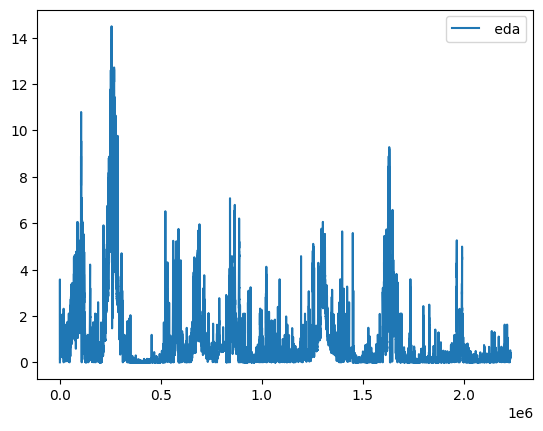

In [147]:
eda_values.plot()

In [148]:
import seaborn as sns
from scipy.signal import find_peaks as fp

## Deteccion de picos de EDA para definir el estres

In [149]:
p2, _ = fp(eda_values[' eda'], prominence=PROMINENCIA,distance=DISTANCIA)
p2

array([      1,      27,      31, ..., 2227835, 2227876, 2229824],
      dtype=int64)

<Axes: xlabel='datetime', ylabel=' eda'>

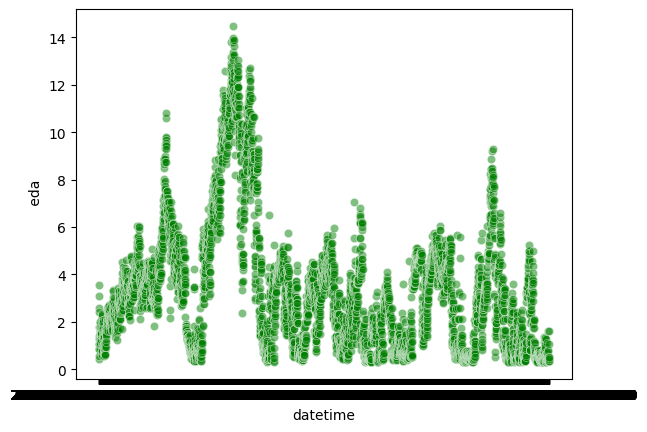

In [150]:
# MOSTRAMOS EL GRAFICO CON LOS PICOS CON LA PROMINENCIA INDICADA EN 0.3
sns.scatterplot(data=eda_values.iloc[p2],
                x='datetime',
                y=' eda',
                color='green',
                alpha=0.5)

In [151]:
# Extraemos los indices
p2 = pd.DataFrame(p2, index=p2, columns=['indice'])
p2.head()

,indice
1,1
27,27
31,31
35,35
54,54


In [152]:
# Añadimos en el dataset los picos detectados
eda_values['peak'] = 0
eda_values.loc[p2.index, 'peak'] = 1
print(eda_values.head(35))

                   datetime       eda  peak
0   2020-07-16 09:29:03.000  0.000000     0
1   2020-07-16 09:29:03.250  0.840149     1
2   2020-07-16 09:29:03.500  0.457482     0
3   2020-07-16 09:29:03.750  0.000000     0
4   2020-07-16 09:29:04.000  0.052509     0
5   2020-07-16 09:29:04.250  0.076843     0
6   2020-07-16 09:29:04.500  0.176739     0
7   2020-07-16 09:29:04.750  0.006404     0
8   2020-07-16 09:29:05.000  0.010246     0
9   2020-07-16 09:29:05.250  0.011526     0
10  2020-07-16 09:29:05.500  0.011526     0
11  2020-07-16 09:29:05.750  0.012807     0
12  2020-07-16 09:29:06.000  0.014088     0
13  2020-07-16 09:29:06.250  0.012807     0
14  2020-07-16 09:29:06.500  0.015369     0
15  2020-07-16 09:29:06.750  0.014088     0
16  2020-07-16 09:29:07.000  0.015369     0
17  2020-07-16 09:29:07.250  0.015369     0
18  2020-07-16 09:29:07.500  0.078124     0
19  2020-07-16 09:29:07.750  0.335547     0
20  2020-07-16 09:29:08.000  0.838868     0
21  2020-07-16 09:29:08.250  1.1

### Trabajando con Datetime
Lo primero sera convertir los datetime a el formato correcto, ya que lo esta detectando como object, lo siguiente sera colocar como index las fechas y al final agrupar por cada 5 minutos los datos para obtener el promedio y media de los datos


In [153]:
# Convertimos en fechas los datimetimes
eda_values['datetime'] = pd.to_datetime(eda_values['datetime'])

In [154]:
eda_values.head()

,datetime,eda,peak
0,2020-07-16 09:29:03.000,0.000000,0
1,2020-07-16 09:29:03.250,0.840149,1
2,2020-07-16 09:29:03.500,0.457482,0
3,2020-07-16 09:29:03.750,0.000000,0
4,2020-07-16 09:29:04.000,0.052509,0


In [155]:
# # Redondear al intervalo de 5 minutos más cercano
# eda_values['5min'] = eda_values['datetime'].dt.floor('5T')

# # Agrupar por cada 5 minutos y calcular la cantidad de picos y la media de los picos
# grouped = eda_values.groupby('5min').agg({
#     'max_eda_per_second': ['count', 'mean']
# }).reset_index()

# # Renombrar columnas para mayor claridad
# grouped.columns = ['5min', 'count_of_peaks', 'mean_of_peaks']

# # Merge de vuelta al DataFrame original
# eda_values = eda_values.merge(grouped, on='5min', how='left')

In [156]:
eda_values.head(30)

,datetime,eda,peak
0,2020-07-16 09:29:03.000,0.000000,0
1,2020-07-16 09:29:03.250,0.840149,1
2,2020-07-16 09:29:03.500,0.457482,0
3,2020-07-16 09:29:03.750,0.000000,0
4,2020-07-16 09:29:04.000,0.052509,0
5,2020-07-16 09:29:04.250,0.076843,0
6,2020-07-16 09:29:04.500,0.176739,0
7,2020-07-16 09:29:04.750,0.006404,0
8,2020-07-16 09:29:05.000,0.010246,0
9,2020-07-16 09:29:05.250,0.011526,0


In [157]:


## Se coloca indices como datetime
eda_values = eda_values.set_index('datetime')
print(eda_values.columns)


Index([' eda', 'peak'], dtype='object')


In [158]:
# Trabajamos con un dataset de EDA values para agruparlo por 5 min
df_procesado_5min = eda_values[' eda'].resample('5min') 
# Para picos tambien
df_procesado_5min_picos = eda_values['peak'].resample('5min')
print('Datos generados en 5 min de agrupacion')



Datos generados en 5 min de agrupacion


### Calculamos le media, la mediana y demas factores de estadistica

En este caso tenemos que obtener el promedio, mediana, max, min, desviacion estandar y quartiles

In [159]:
# Funcion para calcular los cuartiles 1 y 3 que indican en el paper
# 
def quartiles(x):
    return pd.Series([x.quantile(0.25), x.quantile(0.75)], index=['q1', 'q3'])


In [160]:
# Crear a serie de dataframe de 5 min
series5min = quartiles(df_procesado_5min)
series5min.head()

q1    datetime
2020-07-16 09:25:00    0.005123
2020-...
q3    datetime
2020-07-16 09:25:00    0.335883
2020-...
dtype: object

### Aplicamos los calculos estadisticos
Para este punto, tenemos 2 arrays de datos de EDA agrupados en 5 minutos y datos de picos de EDA agrupados en 5 min, ambos arrays distintos, a este punto vamos a generar la media, mediana, max, min, std, etc para esos valores.
En el caso de picos solo queremos conocer que tan comun fue el pico en estos 5 minutos, ello con el promedio, y la cantidad de picos en ese transcurso.

In [161]:
# Definimos los metodos del dataframe a calcular
df_5min = df_procesado_5min.agg(['mean', 'median', 'max', 'min', 'std'])
df_5min_peaks = df_procesado_5min_picos.agg({
    'count': lambda x: (x == 1).sum(),
    'promedio': 'mean'
})
print(df_5min.columns)
df_5min.head(20)

Index(['mean', 'median', 'max', 'min', 'std'], dtype='object')


,mean,median,max,min,std
datetime,,,,,
2020-07-16 09:25:00,0.448949,0.064036,3.570595,0.000000,0.803402
2020-07-16 09:30:00,0.326691,0.372047,0.653164,0.016649,0.165484
2020-07-16 09:35:00,0.631900,0.631659,0.764853,0.506149,0.051198
2020-07-16 09:40:00,1.030635,1.036434,1.396314,0.658554,0.194995
2020-07-16 09:45:00,1.049776,1.044758,1.259278,0.846888,0.083042
2020-07-16 09:50:00,0.954326,0.968556,1.169628,0.759799,0.099029
2020-07-16 09:55:00,0.659374,0.639412,0.981294,0.252567,0.108660
2020-07-16 10:00:00,0.929366,0.899362,1.405279,0.702098,0.132848
2020-07-16 10:05:00,1.148832,1.090224,1.780627,0.782852,0.220604


In [162]:
df_5min_peaks.head()

,count,promedio
datetime,,
2020-07-16 09:25:00,8,0.035088
2020-07-16 09:30:00,1,0.000833
2020-07-16 09:35:00,0,0.000000
2020-07-16 09:40:00,3,0.002500
2020-07-16 09:45:00,1,0.000833


In [163]:
df_5min.count()

mean      1866
median    1866
max       1866
min       1866
std       1866
dtype: int64

In [164]:
df_5min_peaks.count()

count       2173
promedio    1866
dtype: int64

In [165]:
# Juntamos ambos valores ahora en un solo dataframe
df_5min['total_peaks'] = df_5min_peaks['count']
df_5min['mean_peaks'] = df_5min_peaks['promedio']
df_5min.head(30)

,mean,median,max,min,std,total_peaks,mean_peaks
datetime,,,,,,,
2020-07-16 09:25:00,0.448949,0.064036,3.570595,0.000000,0.803402,8,0.035088
2020-07-16 09:30:00,0.326691,0.372047,0.653164,0.016649,0.165484,1,0.000833
2020-07-16 09:35:00,0.631900,0.631659,0.764853,0.506149,0.051198,0,0.000000
2020-07-16 09:40:00,1.030635,1.036434,1.396314,0.658554,0.194995,3,0.002500
2020-07-16 09:45:00,1.049776,1.044758,1.259278,0.846888,0.083042,1,0.000833
2020-07-16 09:50:00,0.954326,0.968556,1.169628,0.759799,0.099029,0,0.000000
2020-07-16 09:55:00,0.659374,0.639412,0.981294,0.252567,0.108660,1,0.000833
2020-07-16 10:00:00,0.929366,0.899362,1.405279,0.702098,0.132848,5,0.004167
2020-07-16 10:05:00,1.148832,1.090224,1.780627,0.782852,0.220604,1,0.000833


In [166]:
df_5min.count()

mean           1866
median         1866
max            1866
min            1866
std            1866
total_peaks    2173
mean_peaks     1866
dtype: int64

In [167]:
df_5min.tail(30)

,mean,median,max,min,std,total_peaks,mean_peaks
datetime,,,,,,,
2020-07-23 20:00:00,0.204414,0.221550,0.678738,0.052773,0.056060,1,0.000833
2020-07-23 20:05:00,0.097975,0.097595,0.395984,0.074544,0.011951,1,0.000833
2020-07-23 20:10:00,0.196988,0.240760,0.355003,0.011792,0.074107,0,0.000000
2020-07-23 20:15:00,0.242971,0.242040,1.624184,0.110135,0.085232,3,0.002500
2020-07-23 20:20:00,0.185666,0.184412,0.815766,0.000000,0.082813,4,0.003333
2020-07-23 20:25:00,0.186624,0.185692,0.315037,0.011526,0.036058,0,0.000000
2020-07-23 20:30:00,0.182989,0.178009,0.769663,0.036125,0.056723,1,0.000833
2020-07-23 20:35:00,0.223663,0.218989,0.350895,0.038419,0.037110,1,0.000833
2020-07-23 20:40:00,0.208328,0.208744,0.263811,0.038419,0.023581,0,0.000000


## DATASET DE 1 HORA
Aplicamos exactamente lo mismo pero ahora aplicado a una hora

In [168]:
# Lo mismo aplicamos para 1 hora
df_procesado_1hora = eda_values[' eda'].resample('1h')
# Para picos tambien
df_procesado_5min_picos = eda_values['peak'].resample('1h') 
# Obtenemos el promedio
df_1hora = df_procesado_1hora.agg(['mean', 'median', 'max', 'min', 'std'])
df_1hora_peaks = df_procesado_5min_picos.agg({
    'count': lambda x: (x == 1).sum(),
    'promedio': 'mean'
})
# Juntamos ambos valores ahora en un solo dataframe
df_1hora['total_peaks'] = df_1hora_peaks['count']
df_1hora['mean_peaks'] = df_1hora_peaks['promedio']
# Removemos las columnas que no necesitamos por ahora
# df_1hora = df_1hora.drop(columns=columns_to_remove)
df_1hora.head(20)

,mean,median,max,min,std,total_peaks,mean_peaks
datetime,,,,,,,
2020-07-16 09:00:00,0.765428,0.766203,3.570595,0.000000,0.323079,14,0.001885
2020-07-16 10:00:00,0.937013,0.816151,2.309762,0.000000,0.435768,56,0.003889
2020-07-16 11:00:00,0.472971,0.488726,1.624281,0.037407,0.141086,6,0.000417
2020-07-16 12:00:00,0.341072,0.293550,2.103368,0.000000,0.180508,11,0.000764
2020-07-16 13:00:00,1.833972,1.805061,3.420278,0.260252,0.560089,197,0.013681
2020-07-16 14:00:00,2.588916,2.678745,4.620881,0.585622,0.635568,126,0.008750
2020-07-16 15:00:00,3.403984,3.323417,6.045711,1.045498,0.759495,251,0.017431
2020-07-16 16:00:00,3.971467,3.568948,10.789403,0.000000,1.725551,260,0.018056
2020-07-16 17:00:00,3.402337,3.443804,7.072930,0.346129,1.016422,231,0.016042


In [169]:
# Separar los cuartiles en columnas individuales
# Obtenemos los quantiles
df_5min_quantil1 = df_procesado_5min.quantile(0.25)
df_5min_quantil3 = df_procesado_5min.quantile(0.75)
df_1hora_quantil1 = df_procesado_1hora.quantile(0.25)
df_1hora_quantil3 = df_procesado_1hora.quantile(0.75)
df_5min['q1'] = df_5min_quantil1
df_5min['q3'] = df_5min_quantil3
df_5min.head(10)
# df_1hora[['q1', 'q3']] = [df_1hora_quantil1,df_1hora_quantil3]


,mean,median,max,min,std,total_peaks,mean_peaks,q1,q3
datetime,,,,,,,,,
2020-07-16 09:25:00,0.448949,0.064036,3.570595,0.000000,0.803402,8,0.035088,0.005123,0.335883
2020-07-16 09:30:00,0.326691,0.372047,0.653164,0.016649,0.165484,1,0.000833,0.139598,0.452092
2020-07-16 09:35:00,0.631900,0.631659,0.764853,0.506149,0.051198,0,0.000000,0.591957,0.670080
2020-07-16 09:40:00,1.030635,1.036434,1.396314,0.658554,0.194995,3,0.002500,0.858042,1.190439
2020-07-16 09:45:00,1.049776,1.044758,1.259278,0.846888,0.083042,1,0.000833,0.986486,1.117119
2020-07-16 09:50:00,0.954326,0.968556,1.169628,0.759799,0.099029,0,0.000000,0.877625,1.036434
2020-07-16 09:55:00,0.659374,0.639412,0.981294,0.252567,0.108660,1,0.000833,0.571465,0.725220
2020-07-16 10:00:00,0.929366,0.899362,1.405279,0.702098,0.132848,5,0.004167,0.819621,1.018824
2020-07-16 10:05:00,1.148832,1.090224,1.780627,0.782852,0.220604,1,0.000833,1.001854,1.325974


In [170]:
df_5min.count()

mean           1866
median         1866
max            1866
min            1866
std            1866
total_peaks    2173
mean_peaks     1866
q1             1866
q3             1866
dtype: int64

In [171]:
# Igual con 1hora de dataset
df_1hora['q1'] = df_1hora_quantil1
df_1hora['q3'] = df_1hora_quantil3
df_1hora.head(10)

,mean,median,max,min,std,total_peaks,mean_peaks,q1,q3
datetime,,,,,,,,,
2020-07-16 09:00:00,0.765428,0.766203,3.570595,0.000000,0.323079,14,0.001885,0.575307,1.013381
2020-07-16 10:00:00,0.937013,0.816151,2.309762,0.000000,0.435768,56,0.003889,0.576588,1.232383
2020-07-16 11:00:00,0.472971,0.488726,1.624281,0.037407,0.141086,6,0.000417,0.408548,0.536886
2020-07-16 12:00:00,0.341072,0.293550,2.103368,0.000000,0.180508,11,0.000764,0.223111,0.412657
2020-07-16 13:00:00,1.833972,1.805061,3.420278,0.260252,0.560089,197,0.013681,1.403703,2.273628
2020-07-16 14:00:00,2.588916,2.678745,4.620881,0.585622,0.635568,126,0.008750,2.208517,3.023257
2020-07-16 15:00:00,3.403984,3.323417,6.045711,1.045498,0.759495,251,0.017431,2.814500,3.837532
2020-07-16 16:00:00,3.971467,3.568948,10.789403,0.000000,1.725551,260,0.018056,2.614298,5.054976
2020-07-16 17:00:00,3.402337,3.443804,7.072930,0.346129,1.016422,231,0.016042,2.805124,4.029639


In [172]:
df_1hora.count()

mean           161
median         161
max            161
min            161
std            161
total_peaks    182
mean_peaks     161
q1             161
q3             161
dtype: int64

## LIMPIEZA DE DATOS
Algunas filas contienen datos NaN, vamos a limpiarlos

In [173]:
df_5min_cleaned = df_5min.dropna(subset=['mean'])
df_1hora_cleaned = df_1hora.dropna(subset=['mean'])
print('Cantidad de datos de dataset 5 min limpiado: ' + str(df_5min_cleaned.count()))
print('Cantidad de datos de dataset 1 hora limpiado: ' + str(df_1hora_cleaned.count()))

Cantidad de datos de dataset 5 min limpiado: mean           1866
median         1866
max            1866
min            1866
std            1866
total_peaks    1866
mean_peaks     1866
q1             1866
q3             1866
dtype: int64
Cantidad de datos de dataset 1 hora limpiado: mean           161
median         161
max            161
min            161
std            161
total_peaks    161
mean_peaks     161
q1             161
q3             161
dtype: int64


In [174]:
# Exportamos los resultados en un csv
df_5min_cleaned.to_csv("EDA_5min.csv")
df_1hora_cleaned.to_csv("EDA_1hora.csv")

### ARCHIVOS CSV GENERADOS CON EXITO PARA 5 MIN Y 1 HORA